In [1]:
# Import everything that you use here. The only packages allowed are from bm-336546
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, accuracy_score, roc_auc_score, log_loss, plot_confusion_matrix, confusion_matrix , ConfusionMatrixDisplay
from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from clean_data import rm_outlier
from clean_data import sum_stat as sst


# Part I: Loss minimization with gradient descent

In [2]:
def loss_func(w1,w2):
    loss = -10*((0.4*np.cos(w1)-w1**2-0.2*w2**7+np.sin(w2))*np.exp(-w1**2-w2**2))
    return loss

In [3]:
loss_func(1,2)

1.7164638098714793

In [4]:
def grad(w1,w2):
    grad_x = -10*((-0.4*np.sin(w1)-2*w1)*np.exp(-w1**2-w2**2)+(0.4*np.cos(w1)-w1**2-0.2*w2**7+np.sin(w2))*-2*w1*np.exp(-w1**2-w2**2))
    grad_y = -10*((-1.4*w2**6+np.cos(w2))*np.exp((-w1**2-w2**2))+(0.4*np.cos(w1)-w1**2-0.2*w2**7+np.sin(w2))*np.exp(-w1**2-w2**2)*(-2*w2))
    return np.array((grad_x,grad_y))

In [5]:
grad(1,2)

array([-3.27548953, -0.80061498])

In [6]:
def grad_desc(w01,w02,learning_rate):
    '''
    calculate gradient descent of the loss function and update the weights accordingly
    :param w01: initial weight 1
    :param w02: initial weight 2
    :param learning_rate: learning rate
    :return: the weights and the loss of each iteration + plot + print the optimal loss and weights
    '''
    w = [w01,w02]
    loss = [loss_func(w01,w02)]
    i = 0
    diff = 10**10
    while  i<300 and diff>10**-4:
        delta_w = -learning_rate*grad(w[-2],w[-1])
        new_w = [w[-2]+delta_w[0] , w[-1]+delta_w[1]]
        w.append(new_w[0])
        w.append(new_w[1])
        new_loss = loss_func(w[-2],w[-1])
        loss.append(new_loss)
        i+=1
        # diff = np.linalg.norm(loss[-1]-loss[-2])
        diff = np.hypot((w[-2]-w[-4]),(w[-1]-w[-3]))

    #print optimal weight-this will print the smallest lost and the weights at this lost
    # min_loss = np.argmin(loss)
    # print(f'Optimal weights (w1,w2)={w[min_loss*2],w[min_loss*2+1]}')
    # print(f'The optimal loss = {np.min(loss)}')


    #print the final weights and loss
    print(f'Optimal weights (w1,w2)={w[-2],w[-1]}')
    print(f'The optimal loss = {loss[-1]}')


    #plot the loss as a function of iteration
    plt.figure(figsize=(8, 6))
    plt.plot(np.arange(1,len(loss)+1),loss)
    plt.xlabel('iteration')
    plt.ylabel('loss')
    plt.title(f'loss as a function of iteration for w01,w02 = {w01,w02} , learnning rate = {learning_rate}')
    plt.show()

    return w,loss



Optimal weights (w1,w2)=(0.001581214458306869, 0.4964921926906216)
The optimal loss = -6.837209294852138


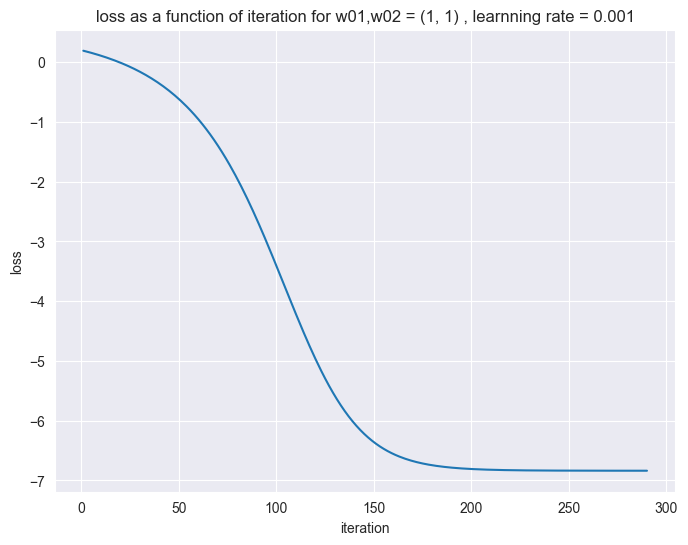

In [7]:
w,loss =grad_desc(1,1,0.001)

Optimal weights (w1,w2)=(0.0, -1.908769390536913)
The optimal loss = -4.688359059966798


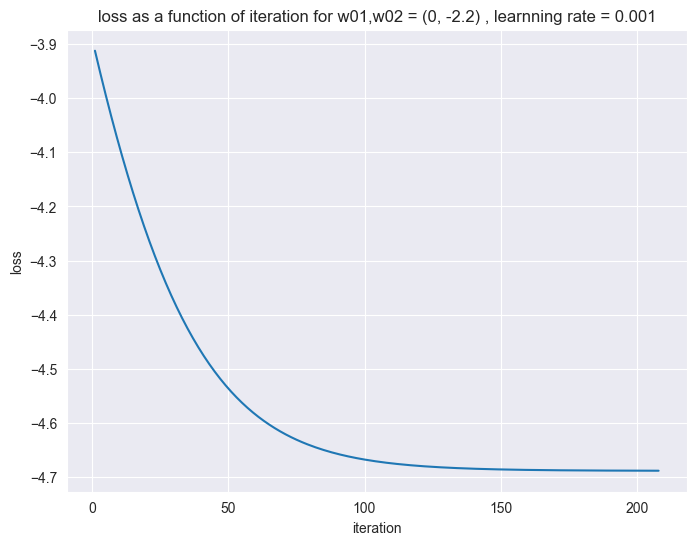

In [8]:
w,loss =grad_desc(0,-2.2,0.001)

Optimal weights (w1,w2)=(0.49146026667276954, 0.47730772088159834)
The optimal loss = -3.5609643259232966


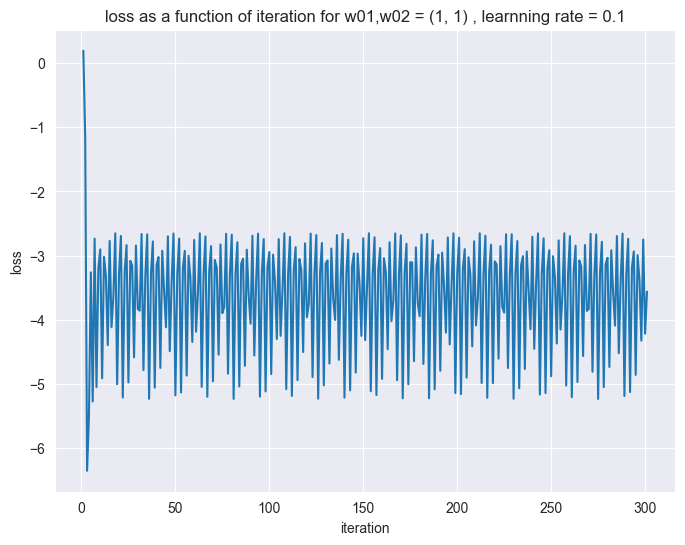

In [9]:
w,loss =grad_desc(1,1,0.1)

Optimal weights (w1,w2)=(2.093983220084856, 2.0221014383514975)
The optimal loss = 0.06545202166601019


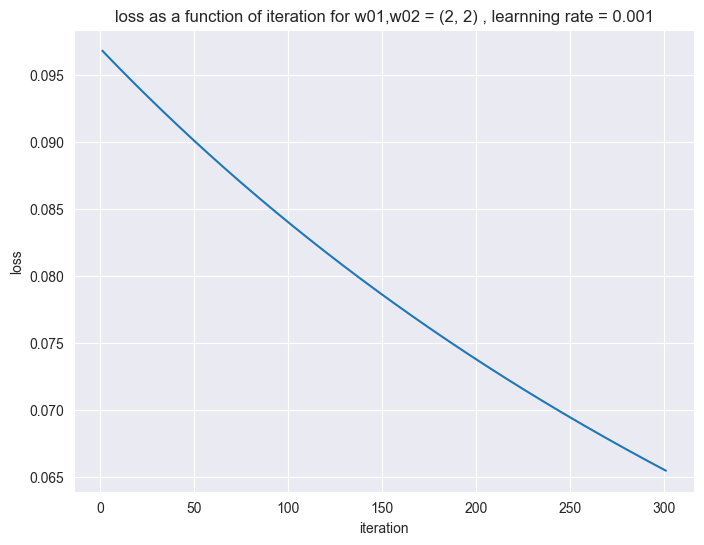

In [10]:
w,loss =grad_desc(2,2,0.001)

## 1.3:
### The loss function is non convex so the minimal loss we will depend on the initial weights and the step size (learning rate) we have no guarantee of converging to the global optimum,the loss can converge to different local/global minima.
### The first graph,grad_desc(1,1,0.001), converge to the global minima (optimal loss around -6) and the second graph-grad_desc(0,-2.2,0.001) converge to the local minima (optimal loss around -4) but with higher convergence rate - converge rapidly and there was no much change at our weight after 250 iteration so our algorithm stopped. those 2 minimum points can be seen in the plot at the next cell.
### for grad_desc(2,2,0.001) - the last graph , we can see that the optimal weights are very similar to the initial weights and the loss is very small - so there was'nt a significant learning.
### for grad_desc(1,1,0.1) the step size is larger than at the other setups so we can see more drastic changes at each iteration and we can see that our model does no converge to a certain minima - we can see oscillations and unsteady loss.


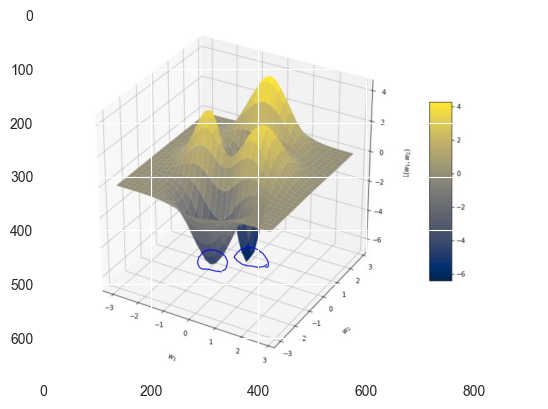

In [11]:
loss_img = plt.imread('Capture.JPG')
plt.imshow(loss_img)
plt.show()

### 1.5)

In [12]:
def loss_func_regularization(w1,w2,lmbda=0):
    loss = -10*((0.4*np.cos(w1)-w1**2-0.2*w2**7+np.sin(w2))*np.exp(-w1**2-w2**2))+lmbda*(w1**2+w2**2)
    return loss

In [13]:
def grad_regularization(w1,w2,lmbda=0):
    grad_x = -10*((-0.4*np.sin(w1)-2*w1)*np.exp(-w1**2-w2**2)+(0.4*np.cos(w1)-w1**2-0.2*w2**7+np.sin(w2))*-2*w1*np.exp(-w1**2-w2**2))+2*lmbda*w1
    grad_y = -10*((-1.4*w2**6+np.cos(w2))*np.exp((-w1**2-w2**2))+(0.4*np.cos(w1)-w1**2-0.2*w2**7+np.sin(w2))*np.exp(-w1**2-w2**2)*(-2*w2))+2*lmbda*w2
    return np.array((grad_x,grad_y))

In [14]:
def grad_desc_regularization(w01,w02,learning_rate,lmbda=0):
    '''
    note:this function can be used for the previous section as well , we set the default lmbda value to 0
    calculate gradient descent update the weights accordingly
    :param w01: initial weight 1
    :param w02: initial weight 2
    :param learning_rate: learning rate
    :return:
    '''
    w = [w01,w02]
    loss = [loss_func_regularization(w01,w02,lmbda)]
    i = 0
    diff = 10**10
    while  i<300 and diff>10**-4:
        delta_w = -learning_rate*grad_regularization(w[-2],w[-1],lmbda)
        new_w = [w[-2]+delta_w[0] , w[-1]+delta_w[1]]
        w.append(new_w[0])
        w.append(new_w[1])
        new_loss = loss_func_regularization(w[-2],w[-1],lmbda)
        loss.append(new_loss)
        i+=1
        diff = np.hypot((w[-2]-w[-4]),(w[-1]-w[-3]))

    #print optimal weight
    # min_loss = np.argmin(loss)
    # print(f'Optimal weights (w1,w2)={w[min_loss*2],w[min_loss*2+1]}')
    # print(f'The optimal loss = {np.min(loss)}')


    #print the final weights and loss
    print(f'Optimal weights (w1,w2)={w[-2],w[-1]}')
    print(f'The optimal loss = {loss[-1]}')


    #plot the loss as a function of iteration
    plt.figure(figsize=(8, 6))
    plt.plot(np.arange(1,len(loss)+1),loss)
    plt.xlabel('iteration')
    plt.ylabel('loss')
    plt.title(f'loss as a function of iteration for w01,w02 = {w01,w02} , learnning rate = {learning_rate},lambda ={lmbda}')
    plt.show()

    return w,loss

Optimal weights (w1,w2)=(0.0015489296378002953, 0.49605952602776476)
The optimal loss = -6.8347829893499155


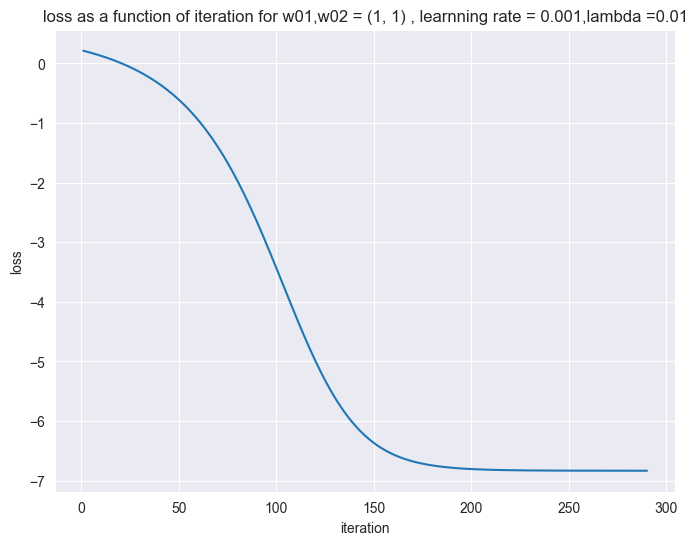

In [15]:
w,loss = grad_desc_regularization(1,1,0.001,lmbda=0.01)

Optimal weights (w1,w2)=(0.0001362951524070234, 0.04797483514378552)
The optimal loss = -4.239105455875441


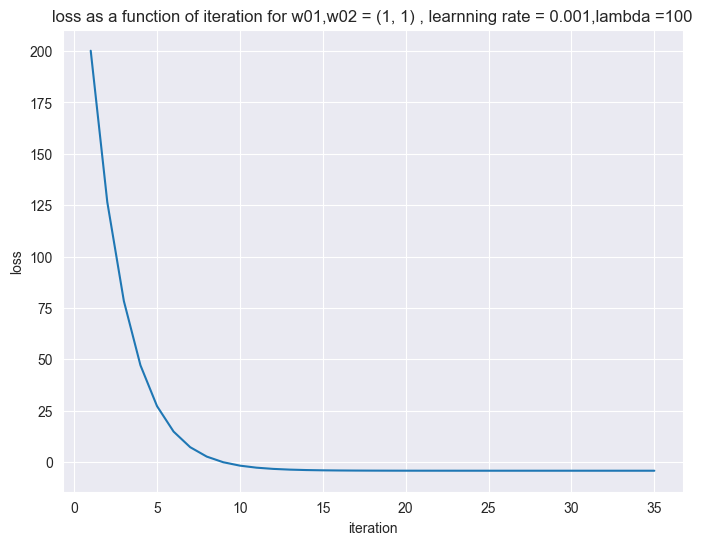

In [16]:
w,loss = grad_desc_regularization(1,1,0.001,lmbda=100)

### comparing results : for lambda=0.001 , we can say that lambda is very small , lambda equals zeros means no regularization at all , very small lambda will result in non significant regularization , so for this case as we expected the results are similar to section 1.3.
### for lambda = 100 , we can see the effect of 'real' regularization , if lambda is infinite then the hypothesis will be equals to the bias , large lambda will result in underfitting , hence the loss will be larger , as we can see this is what we got here the loss is less negative (larger) and the convergence rate is very high , model converge after about 35 iterations only .

# Part II: Linear vs. nonliner classifiers

In [17]:
X = pd.read_csv('X_data.csv')
X.drop(columns=X.columns[0], axis=1, inplace=True)
X.head()

,Age,Systolic_BP,Diastolic_BP,Cholesterol
0,77.196340,85.288742,80.021878,79.957109
1,63.529850,99.379736,84.852361,110.382411
2,69.003986,111.349455,109.850616,100.828246
3,82.638210,95.056128,79.666851,87.066303
4,78.346286,109.154591,90.713220,92.511770


In [18]:
y = pd.read_csv('y_data.csv')  # read and convert to numpy
y.drop(columns=y.columns[0], axis=1, inplace=True)
y.head()

,y
0,1.0
1,1.0
2,1.0
3,1.0
4,1.0


# step 1 :
## data exploring and preprocessing :

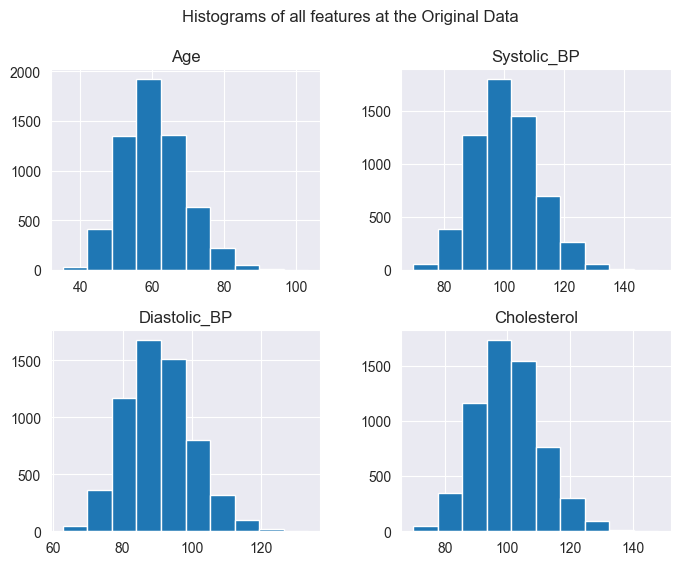

In [19]:
X.hist(figsize=(8,6))
plt.suptitle("Histograms of all features at the Original Data")
plt.show()

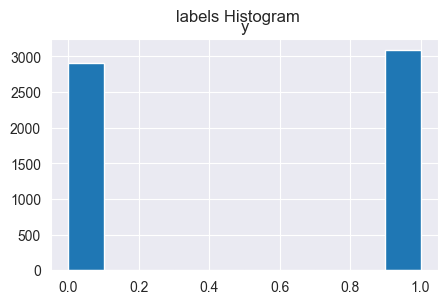

In [20]:
y.hist(figsize=(5,3))
plt.suptitle("labels Histogram")
plt.show()

## thats good , we have about a equal amount of samples at each label

In [21]:
(X.isnull()==False).all()

Age             True
Systolic_BP     True
Diastolic_BP    True
Cholesterol     True
dtype: bool

In [22]:
(y.isnull()==False).all()

y    True
dtype: bool

## so our data does not contains nan values!!
now let's print some statistcs about our features

In [23]:
stat = sst(X)
stat

{'Age': {'min': 35.16476092544677,
  'Q1': 54.37194092508099,
  'median': 59.8311585544339,
  'Q3': 65.80965215704504,
  'max': 103.27949724529527},
 'Systolic_BP': {'min': 69.67542852731282,
  'Q1': 93.26741997049125,
  'median': 100.11992606952535,
  'Q3': 107.43950145615585,
  'max': 151.6996602188728},
 'Diastolic_BP': {'min': 62.80710490744539,
  'Q1': 83.64178774004648,
  'median': 89.91242855475744,
  'Q3': 96.6824047782215,
  'max': 133.4563821720989},
 'Cholesterol': {'min': 69.96745265197228,
  'Q1': 93.20237290175788,
  'median': 100.06063665022847,
  'Q3': 107.25082918520096,
  'max': 148.2335443421762}}

## oldest person is 103 years old , impressive!

## lets visualise outliers and remove them !
we chose to remove outliers because our goal is to learn the distributions , outliers - extreme values might shift the mean and std and effect the distributions .
in this data set we have 6000 examples - relatively small dataset so each outlier will have considerably large effect , we saw that after removing the outliers we are left with about 5800 examples if we were down to smaller number of examples , we might consider applying other threshold to remove less example , because having some outliers after all can improve model robustness.
On the other hand , each example here represents a real patient - so we could use the original data with all examples , we guess there is no one correct approach here .

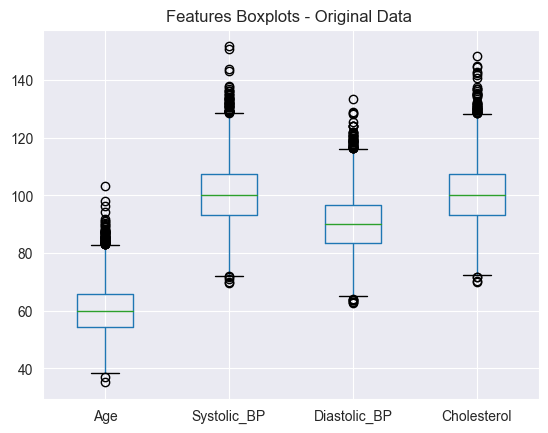

In [24]:
X.boxplot()
plt.title("Features Boxplots - Original Data ")
plt.show()

### in order to remove outliers with the correct label for the correct sample we will create a df with X and y

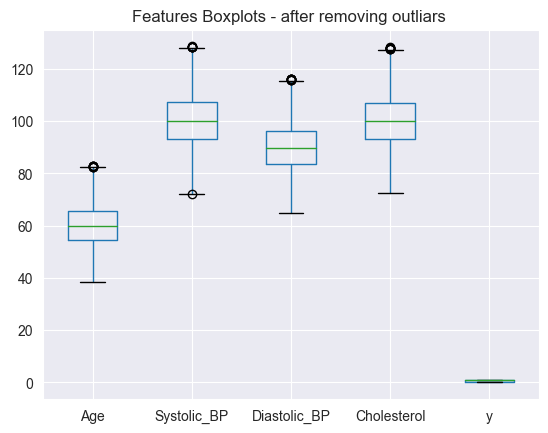

In [25]:
labels = y['y']
df = X.join(labels)
stat = sst((df))
df = rm_outlier(df,stat)
df = df.dropna()
df.boxplot()
plt.title("Features Boxplots - after removing outliars ")
plt.show()

In [26]:
df.head()

,Age,Systolic_BP,Diastolic_BP,Cholesterol,y
0,77.196340,85.288742,80.021878,79.957109,1.0
1,63.529850,99.379736,84.852361,110.382411,1.0
2,69.003986,111.349455,109.850616,100.828246,1.0
3,82.638210,95.056128,79.666851,87.066303,1.0
4,78.346286,109.154591,90.713220,92.511770,1.0


In [27]:
(df.isnull()==False).all()

Age             True
Systolic_BP     True
Diastolic_BP    True
Cholesterol     True
y               True
dtype: bool

### we will round Age and BP to integers because this measures are usually given as integers and rounding will speed up calculations


In [28]:
df['Age']=df['Age'].round()
df['Systolic_BP']=df['Systolic_BP'].round()
df['Diastolic_BP']=df['Diastolic_BP'].round()
df.head(3)

,Age,Systolic_BP,Diastolic_BP,Cholesterol,y
0,77.0,85.0,80.0,79.957109,1.0
1,64.0,99.0,85.0,110.382411,1.0
2,69.0,111.0,110.0,100.828246,1.0


### One more preprocessing method from literature that we think might be relevant - is to check for duplicates in our data , there might be a row that appears more than once by mistake , that could cause data leakage and effect models performances and results, we will make sure our data cleaned from duplicates .


In [29]:
# removing duplicate rows
df.drop_duplicates(inplace=True)

In [30]:
# checking if there are duplicate rows
dup = df.duplicated().any()
if dup:
    print('Dataset contains duplicate that we need to remove')
else:
    print('Dataset do not contains duplicate rows')

Dataset do not contains duplicate rows


In [31]:
#this is our X and y after removing outliars and nans and removing duplicates(if there was duplicates)
X = df.loc[:,:'Cholesterol']
y = df.loc[:,'y']

In [32]:
X

,Age,Systolic_BP,Diastolic_BP,Cholesterol
0,77.0,85.0,80.0,79.957109
1,64.0,99.0,85.0,110.382411
2,69.0,111.0,110.0,100.828246
3,83.0,95.0,80.0,87.066303
4,78.0,109.0,91.0,92.511770
...,...,...,...,...
5995,50.0,95.0,87.0,107.643986
5996,63.0,100.0,94.0,104.971404
5997,56.0,98.0,103.0,120.875951
5998,63.0,107.0,88.0,106.052213


In [33]:
y

0       1.0
1       1.0
2       1.0
3       1.0
4       1.0
       ... 
5995    0.0
5996    1.0
5997    1.0
5998    1.0
5999    0.0
Name: y, Length: 5786, dtype: float64

## we also made sure that features are given at acceptable units.
Age: [years]
Systolic BP: Systolic blood pressure [mmHg]
Diastolic BP: Diastolic blood pressure [mmHg]
Cholesterol: [mg/DL]


### that's all for the preprocessing part.


# Data Spilting ,Scaling :

In [34]:
X_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 336546, stratify=y)

In [35]:
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(X_train)
x_test_scaled = scaler.transform(x_test)

In [36]:
# pd.DataFrame(x_train,columns=X_train.columns)  #this is a df of x_train scaled but with the columns names

relation between labels at the test set and at the training set:

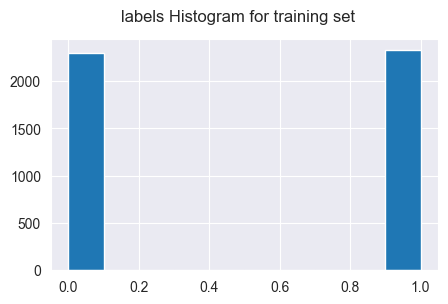

In [37]:
y_train.hist(figsize=(5,3))
plt.suptitle("labels Histogram for training set")
plt.show()

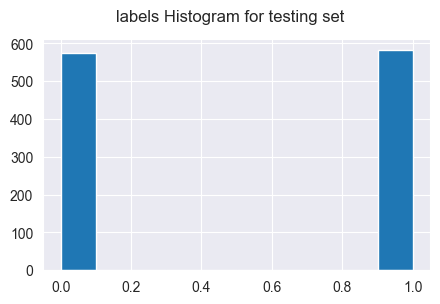

In [38]:
y_test.hist(figsize=(5,3))
plt.suptitle("labels Histogram for testing set")
plt.show()

In [39]:
test_positive = np.mean(y_test) * 100
train_positive = np.mean(y_train) * 100
print(f'test set - {test_positive:.3f}% of samples are labeled as 1')
print(f'train set - {train_positive:.3f}% of samples are labeled as 1')

test set - 50.259% of samples are labeled as 1
train set - 50.259% of samples are labeled as 1


### we can see that training and testing sets has about the same ratio of 0 and 1 labels - both sets has slightly more positive labels , the distribution of the labels was kept during the spilt!

### analysis to show that the distribution of the features is similar between test and train:


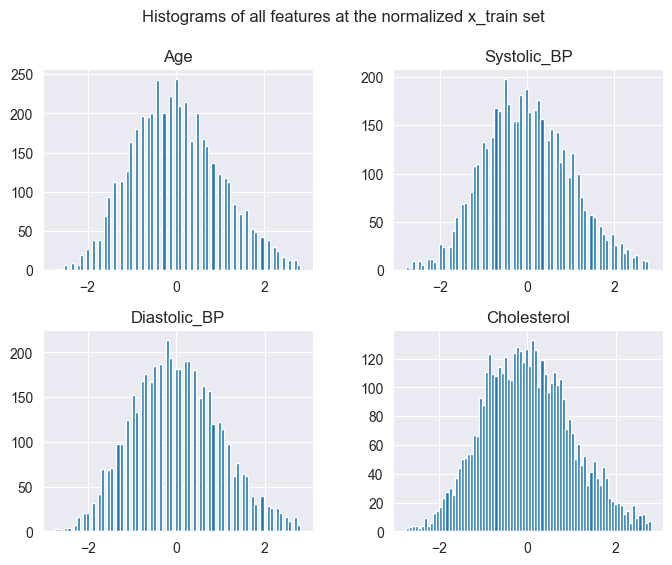

In [40]:
pd.DataFrame(x_train_scaled,columns=X_train.columns).hist(figsize=(8,6),bins=80)
plt.suptitle("Histograms of all features at the normalized x_train set")
plt.show()

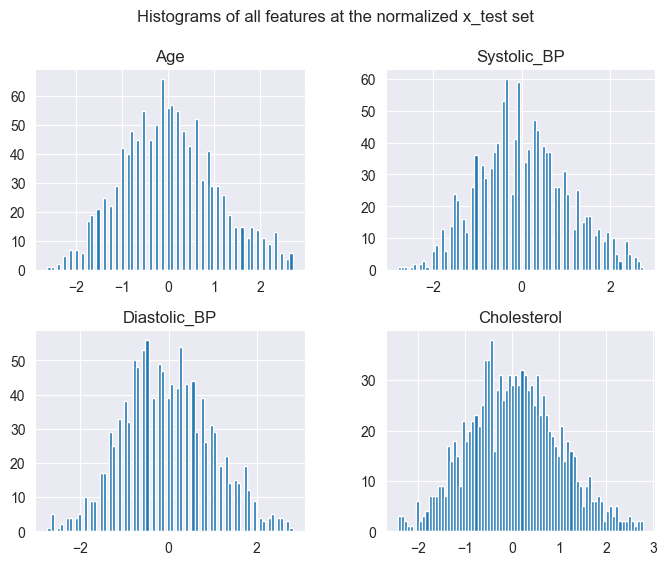

In [41]:
pd.DataFrame(x_test_scaled,columns=x_test.columns).hist(figsize=(8,6),bins=80)
plt.suptitle("Histograms of all features at the normalized x_test set")
plt.show()

questions:
i. What issues could an imbalance of labels in the training set rise? Search in the scientific
literature at least one possible solution. Explain how this solution should help.
ii. What labels imbalance between train and test cause? What is the solution we gave in
the tutorial?
answers:
i.
If our data contains 6000 examples and let us take it tp the extreme ,let's say that 5990 of them are labeled as 0 and only 10 are labeled as 1 - which correspond to disease , then this is extremely unbalanced dataset , if we use this data for training our model do not have an option to learn about the disease category , hence it might learn to predict all examples as 0 , and will not be able to perform well on a balanced dataset.
one method from literature to overcome this problem is SMOTE - Synthetic Minority Oversampling Technique ,
generate new data based on implications of old data. Basically, use the current inputs to generate new input rows that are unique but will have a label based on what the original data implies. In the case above, one simple way to think of this idea would be to add rows with label 1 to the data where the inputs represent total or partial similarities in values to current input features.
explanation - our goal is to balance the labels , so we can remove some of the example of the larger group , and create synthetically new examples for the smalled group with data augmentation .
ii.
All the model's learning is being done on the training set , if we split the data in an imbalance manner , our model might no perform well on the test set , it might overfit to the training set and will fail to generalize when given the test set .
At the tutorial we overcome this issue by using Y (our labels) as a stratification for the split , meaning we made sure the distribution of labels is being kept at the spite to test and train sets , so both will has the same distribution.

## now lets visualize relation between our features and our features-labels relation

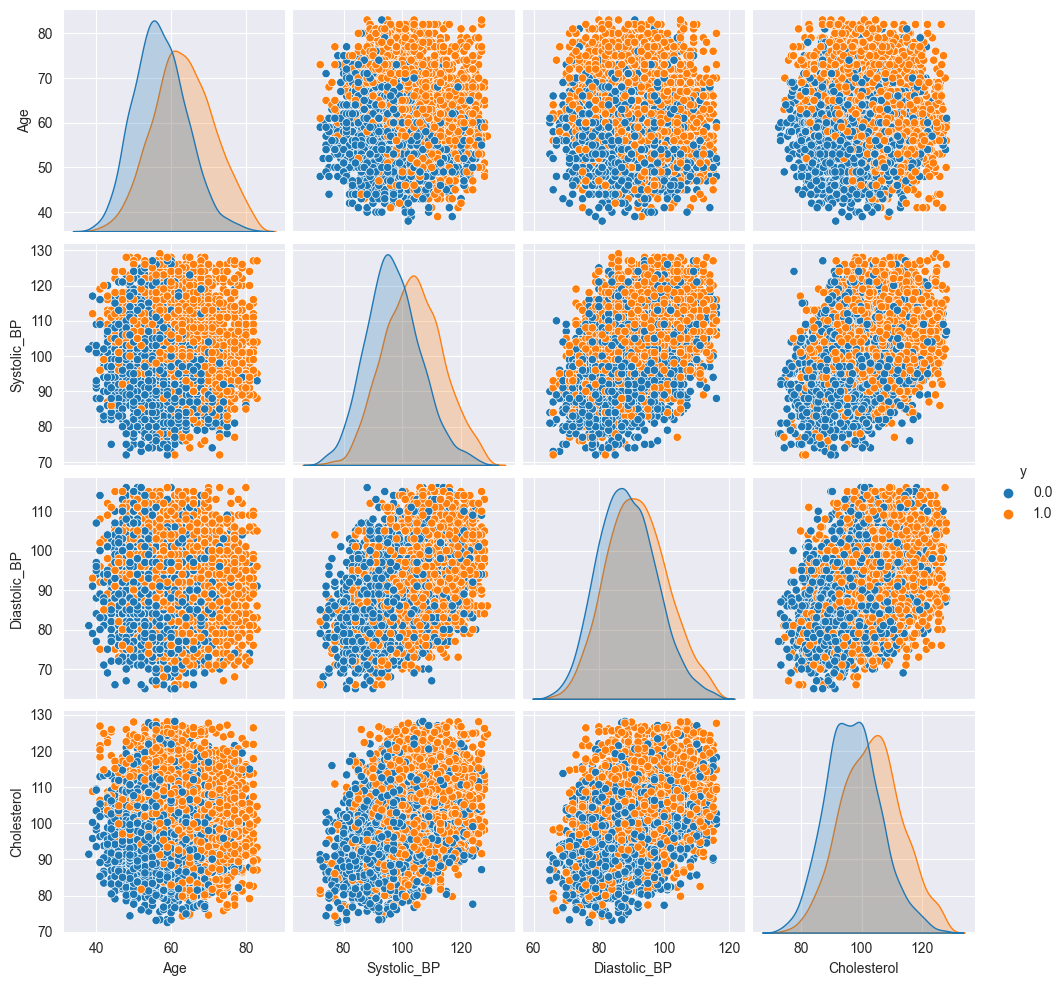

In [43]:
sns.pairplot(df.loc[:,:'y'], hue="y")
plt.show()

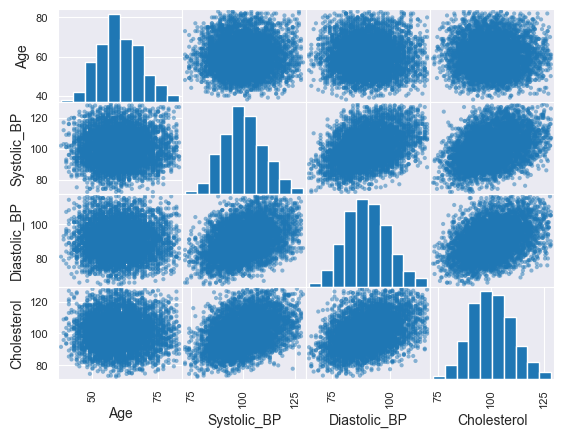

In [44]:
pd.plotting.scatter_matrix(df[['Age','Systolic_BP','Diastolic_BP','Cholesterol']])
plt.show()

questions:
i. Was there anything unexpected?
ii. Are there any features that you feel will be particularly important to your model? Explain
why. Base your answer on a valid reference.
answers:
we can see here that high cholesterol , high age and high systolic BP all correlated with positive label .
In addition , most of our features do not have high correlation between them,the only two features which are  correlated are systolic and diastolic BP ,if 2 or more features were linear correlated we might be able to reduce the number of features and not get inferior results with our model , but this is not the case here.

ii.
According to literature older people tend to a higher risk for diabetes , and having diabetes for longer time increases the risk to have diabetic retinopathy , so we believe age will be particulary important to our model , in addition high cholesterol and high systolic BP are correlated with other eyes condition so they might be important as well.
refs:
https://www.sciencedirect.com/science/article/pii/S0002939403002198
https://europepmc.org/article/med/15078674

# Choose, build and optimize Machine Learning Models

we will implement a function that train our chosen model and evaluate it's performances with a few metrics .

In [45]:
def model_ev(model,x_train,y_train,x_test,y_test):
    '''
    train the model ,chose the model with the best params make predictions - print acc,ROCAUC,F1 score and plot a confusion matrix for the test set
    :param model: GridSearchCV object or model
    :param x_train:
    :param y_train:
    :param x_test:
    :param y_test:
    :return:
    '''
    model.fit(x_train,y_train)
    if type(model)==GridSearchCV:
        print(f'best parametrs : {model.best_params_}')
        chosen=model.best_estimator_
        print('')
    else:
        chosen = model

    y_pred_train = chosen.predict(x_train)
    y_pred_test = chosen.predict(x_test)

    print('Training set:')
    print(f'ACC = {accuracy_score(y_train,y_pred_train):.4f} ')
    print(f'F1 = {f1_score(y_train,y_pred_train):.4f}')
    print(f'AUROC = {roc_auc_score(y_train,y_pred_train):.4f}')
    print('')
    print('Testing set:')
    print(f'ACC = {accuracy_score(y_test,y_pred_test):.4f}')
    print(f'F1 =  {f1_score(y_test,y_pred_test):.4f}')
    print(f'AUROC = {roc_auc_score(y_test,y_pred_test):.4f}')

    cm = confusion_matrix(y_test, y_pred_test, labels=model.classes_)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=model.classes_)
    disp.plot(cmap='BuGn')
    plt.title('confusion matrix for the test set')
    plt.grid(False)
    plt.show()
    return chosen

# creaing models , optimizing and tunning the hyperparamater :

## LogisticRegression

best parametrs : {'logistic__C': 0.1, 'logistic__penalty': 'l1'}

Training set:
ACC = 0.7459 
F1 = 0.7445
AUROC = 0.7459

Testing set:
ACC = 0.7159
F1 =  0.7186
AUROC = 0.7159


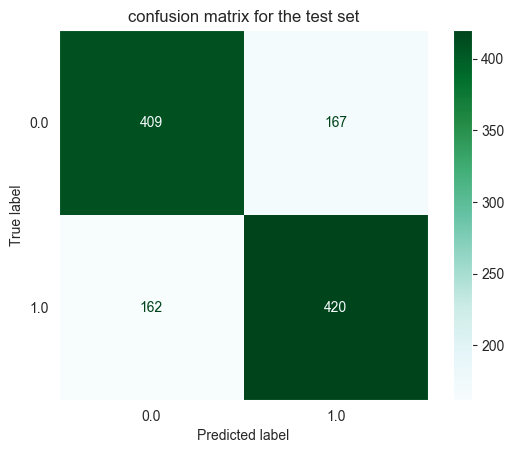

In [47]:
logreg_chosen=model_ev(clf,X_train,y_train,x_test,y_test)

# SVM

In [48]:
C = np.array([0.001,0.01, 0.1,1])

svc = SVC(probability=True, random_state=336546)
svm_pipe = Pipeline(steps=[('scale', StandardScaler()), ('svm', svc)])
CV_svm = GridSearchCV(estimator=svm_pipe,
             param_grid={'svm__kernel':['linear','rbf','poly'], 'svm__C':C },
             scoring=['accuracy','f1','roc_auc'],
             cv=skf, refit='roc_auc', verbose=0, return_train_score=True)


best parametrs : {'svm__C': 0.01, 'svm__kernel': 'linear'}

Training set:
ACC = 0.7437 
F1 = 0.7427
AUROC = 0.7438

Testing set:
ACC = 0.7159
F1 =  0.7186
AUROC = 0.7159


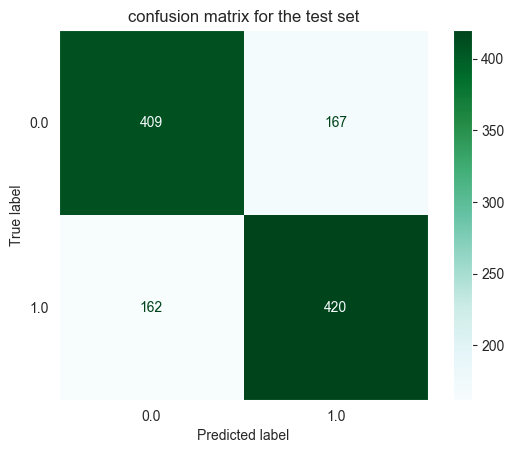

In [49]:
svm=model_ev(CV_svm,X_train, y_train,x_test,y_test)

# Random forest

## random forest do not use gradient decent so scaling is not required !

In [50]:
param_grid = {'rfc__criterion':['gini', 'entropy'],'rfc__max_depth':[5,6],'rfc__max_features':['sqrt', 'log2']}
rf = RandomForestClassifier(random_state=336546)
rfc = Pipeline(steps=[('rfc', rf )])
CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid ,scoring=['accuracy','f1','recall','roc_auc'],cv=skf, refit='roc_auc',verbose=0, return_train_score=True)

# we were wondering why we get an error when we tried to use rd as our estimator for the GridSearchCV

best parametrs : {'rfc__criterion': 'entropy', 'rfc__max_depth': 6, 'rfc__max_features': 'sqrt'}

Training set:
ACC = 0.7744 
F1 = 0.7798
AUROC = 0.7743

Testing set:
ACC = 0.7176
F1 =  0.7277
AUROC = 0.7174


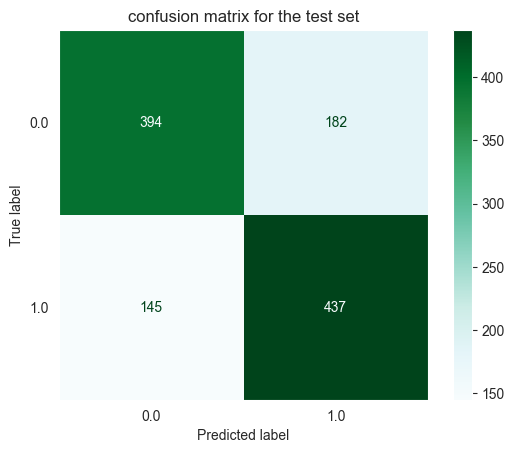

In [51]:
randomforest=model_ev(CV_rfc,X_train, y_train,x_test,y_test)

# naive classifier :

In [52]:
positive = y_test[y_test==1]
# negative = y_test[y_test==0]
print(f'success percentage for naive classifier = {len(positive) / len(y_test) * 100:.3f}%')

success percentage for naive classifier = 50.259%


### so a naive classifier which predict all examples to be positive will be correct for about 50% of the examples

C:\Users\rasht\miniconda3\envs\bm-336546\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metrics.RocCurveDisplay.from_predictions` or :meth:`sklearn.metrics.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)
C:\Users\rasht\miniconda3\envs\bm-336546\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metrics.RocCurveDisplay.from_predictions` or :meth:`sklearn.metrics.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)
C:\Users\rasht\miniconda3\envs\bm-336546\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`pl

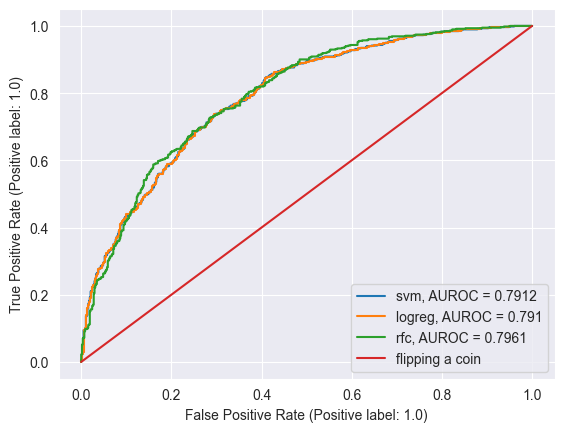

In [53]:
from sklearn.metrics import plot_roc_curve
classifiers = [svm, logreg_chosen, randomforest]
roc_score = []
plt.figure()
ax = plt.gca()
for clf in classifiers:
    plot_roc_curve(clf, x_test, y_test, ax=ax)
    roc_score.append(np.round_(roc_auc_score(y_test, clf.predict_proba(x_test)[:,1]), decimals=4))
ax.plot(np.linspace(0,1,x_test.shape[0]),np.linspace(0,1,x_test.shape[0]))
plt.legend(('svm, AUROC = '+str(roc_score[0]),'logreg, AUROC = '+str(roc_score[1]),'rfc, AUROC = '+str(roc_score[2]),'flipping a coin'))

question:
(d) Which performed the best on the testset? Linear or nonlinear models? Compare all of them
to a naive classifier. *Notice that the difference in performance between the models can be
subtle.
answer:
all models performed about the same , all metrics are very similar for the test set at all models .
we can't really chose one model that performed better than the other ,Random forest - got the best AUROC-the metric we tried to maximize,but with 0.005 difference which is very small .
 The differnces between the models are very very subtle so if we really had to chose a model we will go with one of the linear models wich are simpler and in this case do  not gives an inferior results .
on the bright side ,all models performed better than naive classifier .



## feature_importances_

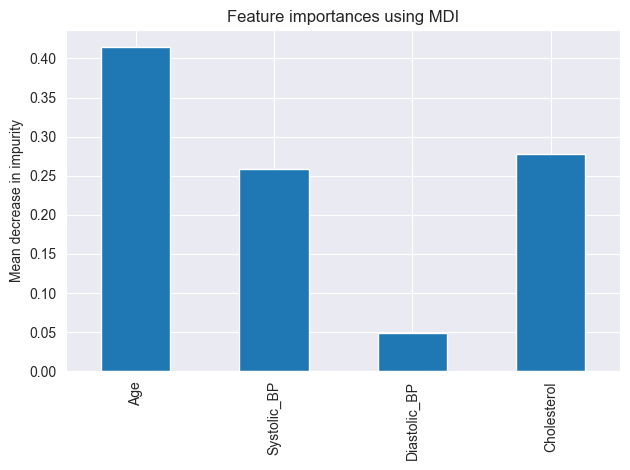

In [54]:
# feature importence for random forest model:
rfc_chosen = RandomForestClassifier(criterion='entropy', random_state=336546,max_depth=6,max_features='sqrt')
rfc_chosen.fit(x_train_scaled,y_train)
importances = rfc_chosen.feature_importances_
feature_names=[f"{X.columns[i]}" for i in range(X.shape[1])]
forest_importances = pd.Series(importances, index=feature_names)

std = np.std([rfc_chosen.feature_importances_ for tree in rfc_chosen.estimators_], axis=0)
fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

Training set:
ACC = 0.7744 
F1 = 0.7798
AUROC = 0.7743

Testing set:
ACC = 0.7176
F1 =  0.7277
AUROC = 0.7174


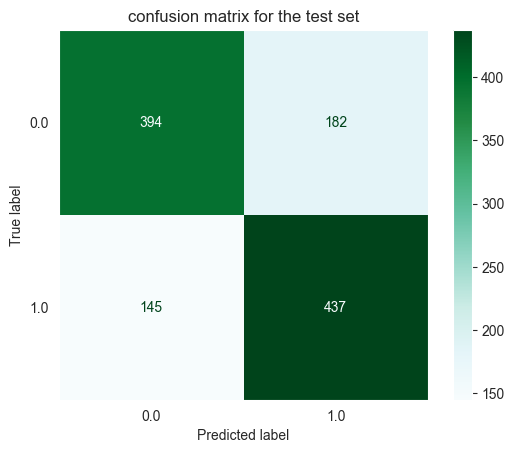

RandomForestClassifier(criterion='entropy', max_depth=6, random_state=336546)

In [55]:
model_ev(rfc_chosen,x_train_scaled, y_train,x_test_scaled,y_test)

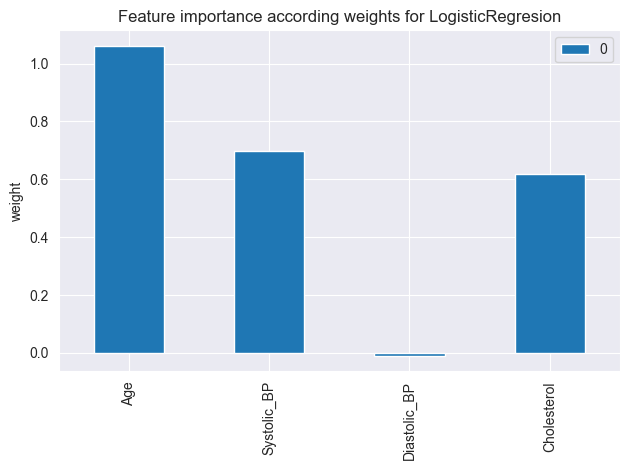

In [56]:
# feature importance  for Logistic regression according learned weights:

logreg_chosen = LogisticRegression(random_state=336546,C=0.1,penalty='l1', max_iter=max_iter,solver='saga')
logreg_chosen.fit(x_train_scaled,y_train)
importances2 = logreg_chosen.coef_.T
feature_names=[f"{X.columns[i]}" for i in range(X.shape[1])]
logreg_importances = pd.DataFrame(importances2, index=feature_names)

fig, ax = plt.subplots()
logreg_importances.plot.bar(ax=ax)
ax.set_title("Feature importance according weights for LogisticRegresion")
ax.set_ylabel("weight")
fig.tight_layout()
plt.show()


questions:
i. Report AUC, F1, ACC for both train and test set for the Random Forest model.
ii. Is there a performance difference between train and test? Why? If there is a difference,
what can you do to reduce it?
iii. What is the advantage of Random Forest model compared to SVM model?
iv. What are the 2 most important features according to the random forest? What are the
two most important according to logistic regression? Does this match up with the feature
exploration you did?


i. answer above
ii. yes , the random forest model performed better on the training set , meaning that our model tend to overfitting , we can reduce the max depth param to a smaller number , that will reduce the number of branches of the tree and will possibly reduce overfitting.
It is common for there to be a performance difference between the training and test sets, especially if the model is overfitting the training data. This means that the model is performing well on the training data but is not able to generalize well to new, unseen data. This can happen if the model is too complex for the amount of training data, or if the model is not using the right features to make predictions.

To reduce the performance difference between the training and test sets, there are several things you can try:

Collect more training data: This can help the model learn more about the underlying patterns in the data, which can make it more robust when applied to new, unseen data.

Use regularization techniques: These techniques, such as weight decay and dropout, can help prevent the model from overfitting the training data by adding a penalty for large weights or randomly dropping out neurons during training.

Simplify the model: A simpler model is less likely to overfit the training data and may generalize better to new data.

Use cross-validation: This involves dividing the training set into multiple smaller sets, training the model on one set and evaluating it on another, and repeating this process until all sets have been used for both training and evaluation. This can help provide a more accurate estimate of the model's performance on unseen data.

Tune hyperparameters: The hyperparameters of a model, such as the learning rate and the number of hidden units, can have a significant impact on its performance. By tuning these hyperparameters, you can often improve the model's performance on the test set.

iii. Random Forest is suited for multiclass problems, while SVM is intrinsically two-class. Random Forest also works well with a mixture of numerical and categorical features. In addition, SVM doesn't perform well on a large data set because the required training time is higher.
At our results , random forest performed better than SVM , we can see that it scored a bit higher at all metrics both for training and testing sets, it got a higher rate of TP but did worse at the TN.

iv.The 2 most important features for random forest are age and Cholesterol , for Logistic regression Age and Systolic BP. but we can see that Age is by far the most important feature for both model , and that Cholesterol and systolic BP have about the same importance .
this match the exploration we did - according to literature in general , if Age is given as one of the features the model (all models) the age feature will be very important and in most cases will be the most important feature ,as happened here for both modals. regarding BP - our dataset contains 6,000 diabetic patients ,Diabetes causes damage by scarring the kidneys, which in turn leads to salt and water retention, which in turn raises blood pressure , in addition Retinopathy is an eye condition that causes changes to the blood vessels in the part of the eye called the ”retina” - those changes to the blood vessels are related with high systolic BP .

systolic vs diastolic - pressure the heart exerts while beating (systolic pressure). The amount of pressure in the arteries between beats (diastolic pressure) - systolic represents the resistance (elestance) the heart facing when trying to pump the blood , and this is one important as we can at our features importance.
